# K-cluster Algorithm Analysis

In this script, our objective is to apply unsupervised machine learning to uncover new patterns within the dataset. We will utilize the K-means clustering algorithm to identify distinct clusters and gain insights into their characteristics

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to \"call\" them specifically
%matplotlib inline

In [5]:
#import the dataset for Covid Pattern,
path = r'C:\Users\Home\Desktop\Task 6.1'
Covid_data = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'Covid_data.csv'))

### Data Cleaning

In [6]:
Covid_data.head()

,Unnamed: 0,Country,Continent,Population,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,0,USA,North America,331198130,5032179,162804,2576668,2292707,18296,15194,492.0,63139605,190640
1,1,Brazil,South America,212710692,2917562,98644,2047660,771258,8318,13716,464.0,13206188,62085
2,2,India,Asia,1381344997,2025409,41638,1377384,606387,8944,1466,30.0,22149351,16035
3,3,Russia,Europe,145940924,871894,14606,676357,180931,2300,5974,100.0,29716907,203623
4,4,South Africa,Africa,59381566,538184,9604,387316,141264,539,9063,162.0,3149807,53044


In [7]:
# Dropping unneeded columns and creating data subset
Covid_Data = Covid_data.drop(['Unnamed: 0','Continent','Country'], axis = 1)

### Find the Elbow

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(Covid_Data).score(Covid_Data) for i in range(len(kmeans))] # Creates a score that represents
# a rate of variation for the given cluster option

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

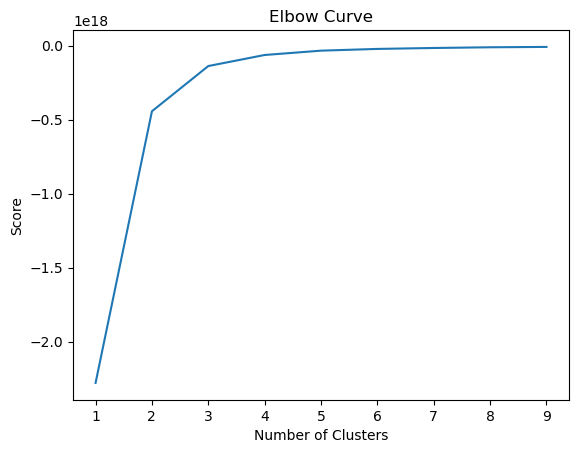

In [10]:
# Plot the elbow curve using PyLab,
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**_The curve begins to straightens out after three. This means the optimal number of cluster is three._**

### K-means Clustering

In [13]:
# Create the k-means object,
kmeans = KMeans(n_init=10,n_clusters = 3)

In [14]:
# Fit the k-means object to the data,
kmeans.fit(Covid_Data)

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [15]:
Covid_Data['clusters'] = kmeans.fit_predict(Covid_Data) #adding clusters column to a dataframe

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
Covid_Data.head()

,Population,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,clusters
0,331198130,5032179,162804,2576668,2292707,18296,15194,492.0,63139605,190640,2
1,212710692,2917562,98644,2047660,771258,8318,13716,464.0,13206188,62085,2
2,1381344997,2025409,41638,1377384,606387,8944,1466,30.0,22149351,16035,1
3,145940924,871894,14606,676357,180931,2300,5974,100.0,29716907,203623,2
4,59381566,538184,9604,387316,141264,539,9063,162.0,3149807,53044,0


In [17]:
Covid_Data['clusters'].value_counts()

clusters
0    194
2     13
1      1
Name: count, dtype: int64

### Population vs Total Cases

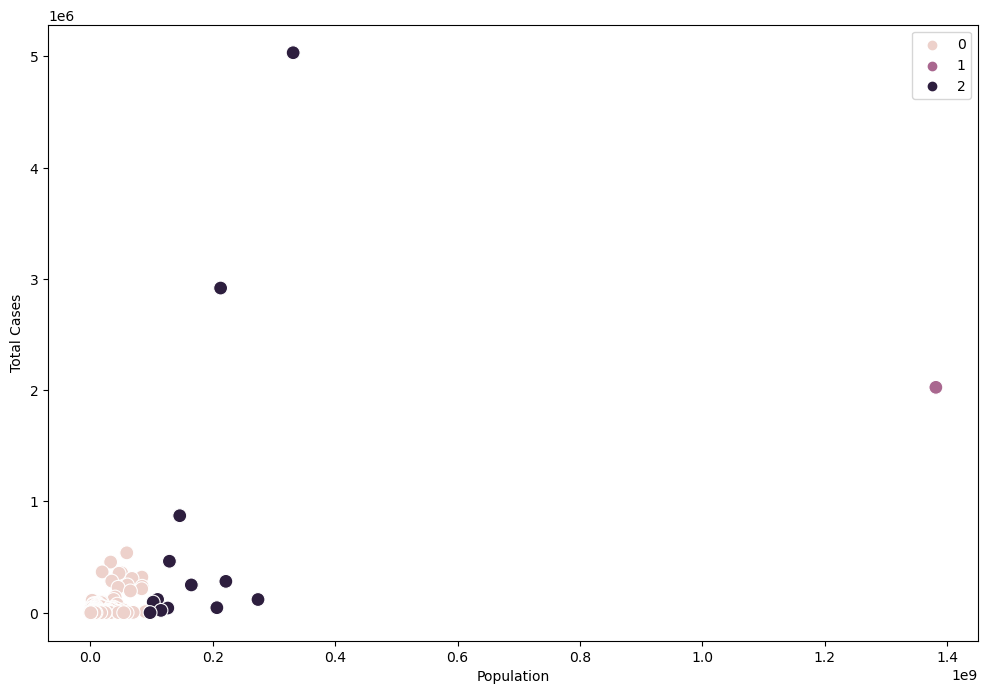

In [18]:
# Plot the clusters for the \"Population\" and \"Total Cases\" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Covid_Data['Population'], y=Covid_Data['Total Cases'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population') # Label x-axis.
plt.ylabel('Total Cases') # Label y-axis.
plt.show()

In [21]:
#exporting the visual
ax.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'Covid_cluster.png'))

### Total Cases vs Total Deaths

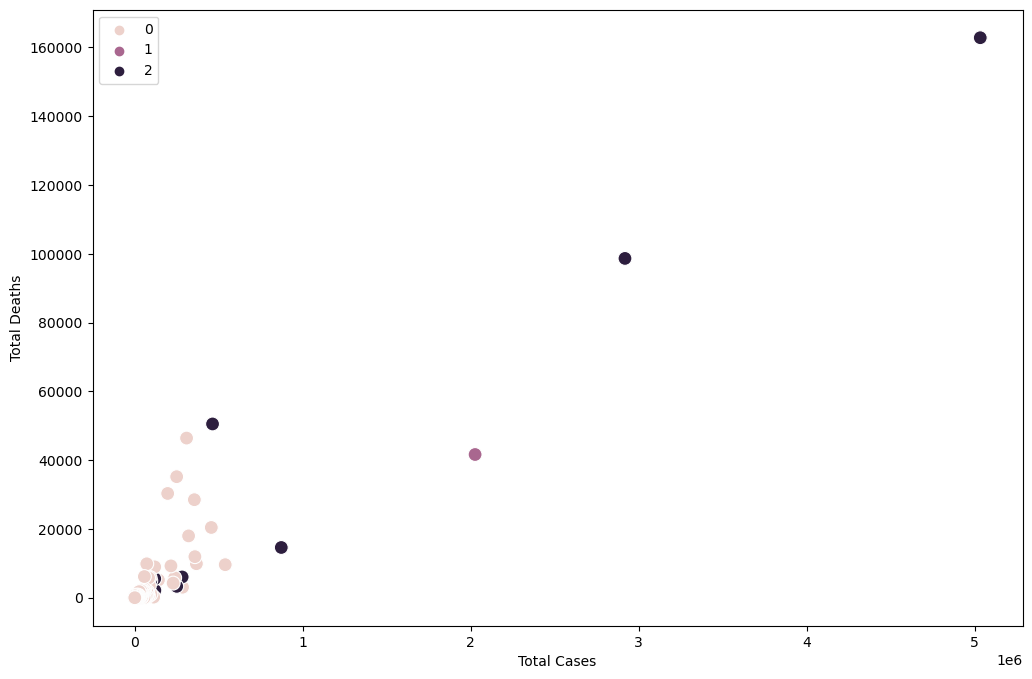

In [22]:
# Plot the clusters for the \"Total Cases\" and \"Total Deaths\" variables,
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Covid_Data['Total Cases'], y=Covid_Data['Total Deaths'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background
plt.xlabel('Total Cases') # Label x-axis
plt.ylabel('Total Deaths') # Label y-axis
plt.show()

In [23]:
#exporting the visual
ax.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'Deaths_cluster.png'))

## Total Cases vs Total Recovered

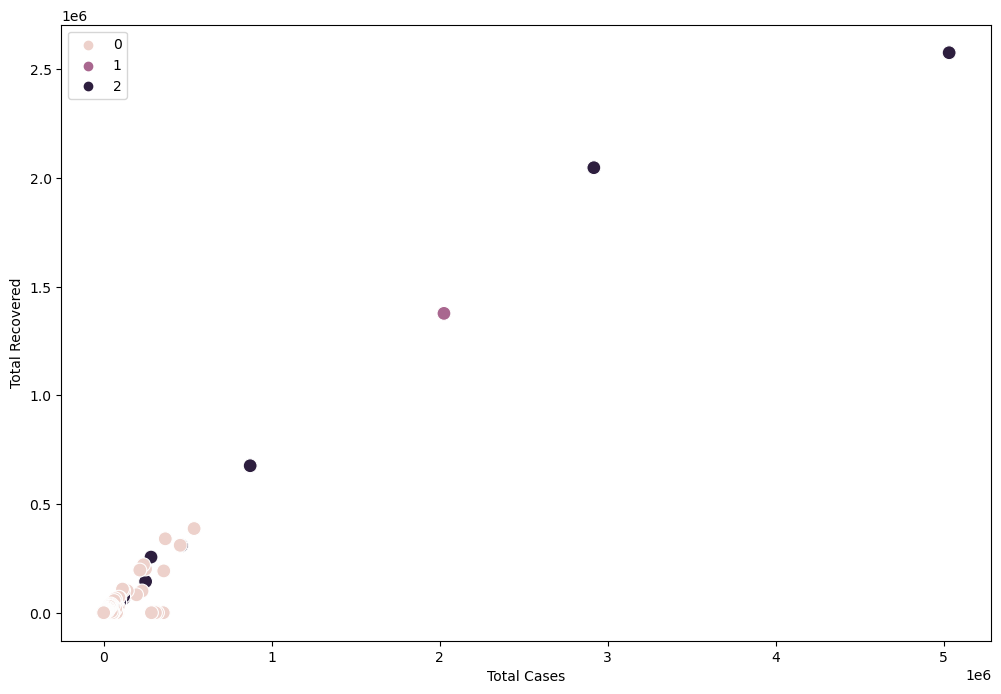

In [24]:
# Plot the clusters for the \"Total Cases\" and \"Total Recovered\" variables,
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Covid_Data['Total Cases'], y=Covid_Data['Total Recovered'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background
plt.xlabel('Total Cases') # Label x-axis
plt.ylabel('Total Recovered') # Label y-axis
plt.show()

In [26]:
#exporting the visual
ax.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'recovery_cluster.png'))

### Key Insights
- Both Population and Total Covid Cases in the  data points concentrated between 0.0 and 0.2, suggesting that they have minimal impact and not related much
- The clusters for Total Covid Cases, Total Deaths, and Total Recovered all show some similar positive slopes, indicating a positive relationship between them.

### The Descriptive Statistics

In [24]:
#rename clusteres,
Covid_Data.loc[Covid_Data['clusters'] == 2, 'clusters'] = 'dark purple'
Covid_Data.loc[Covid_Data['clusters'] == 1, 'clusters'] = 'purple'
Covid_Data.loc[Covid_Data['clusters'] == 0, 'clusters'] = 'pink'

In [27]:
Covid_Data.groupby('clusters').agg({
    'Population': ['mean', 'median'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total Recovered': ['mean', 'median'],
    'Active Cases': ['mean', 'median'],
    'Critical Cases': ['mean', 'median']
})


Population                 Total Cases             \
                     mean        median          mean     median   
clusters                                                           
dark purple  1.720617e+08  1.459409e+08  7.890932e+05   119460.0   
pink         1.396018e+07  5.824606e+06  3.548883e+04     3405.0   
purple       1.381345e+09  1.381345e+09  2.025409e+06  2025409.0   

             Total Deaths          Total Recovered              Active Cases  \
                     mean   median            mean     median           mean   
clusters                                                                       
dark purple  26989.615385   4951.0    4.824247e+05    75645.0  279678.923077   
pink          1652.015464     63.5    1.856330e+04     1461.0    7365.597938   
purple       41638.000000  41638.0    1.377384e+06  1377384.0  606387.000000   

                      Critical Cases          
               median           mean  median  
clusters                                      
dark purple   41157.0    2638.230769   185.0  
pink            685.0     113.149485     2.0  
purple       606387.0    8944.000000  8944.0

In [29]:
Covid_Data.loc[Covid_Data['clusters'] == 'dark purple', 'clusters'] = 'Mildly Impacted'
Covid_Data.loc[Covid_Data['clusters'] == 'purple', 'clusters'] = 'Severely Impacted'
Covid_Data.loc[Covid_Data['clusters'] == 'pink', 'clusters'] = 'Less Impacted'

In [30]:
Covid_Data['clusters'].value_counts()

clusters
Less Impacted        194
Mildly Impacted       13
Severely Impacted      1
Name: count, dtype: int64